In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# linear regression

# y = wX + b   => wX      w: D+1 dimension
# use MSE/MAE   
# L = ((y-y^hat))^2   y^hat = wX
# dL/dw = 1/N * 2(y - y_hat)*x, 
# w = w - r*dL/dw


In [49]:
import numpy as np
from numpy.random import rand
from sklearn import datasets
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.model_selection import train_test_split
from copy import deepcopy

In [50]:
class LinearRegression(object):

    def __init__(self):
        self.w = None          #dimension D x 1         
        self.loss = []
        self.history_weights = []
        
    def linear_func(self, X, w):
        return np.dot(X, w)
    
    def fit(self, X, y, epochs=20, lr=0.05):
        # input: X -- NXD ; y -- NX1
        # gradient descent
                
        w = rand(X.shape[1])   # weight: Dx1
        b = rand(X.shape[1])   
        
        N = len(X)          # number of instances
        for i in range(epochs):
            
            #Gradient descent
            y_hat = self.linear_func(X, w)
            #print("ss11111: ", X.shape, y.shape, w.shape, b.shape, y_hat.shape)
           
            dw = 2 * np.dot(X.T, y_hat - y)/N
            
            w -= lr * dw        # lr * dot(X.T, y_hat -y)/ N
            
            curr_loss = self.loss_func(X, y, w)
            #print("wwwww: ", w)
            self.loss.append(curr_loss)
            
            self.history_weights.append(deepcopy(w))
            
        self.w = w
        self.b = b
                                   
    def loss_func(self, X, y_true, w):
        # use MSE here
        N = len(X)
        y_hat = self.linear_func(X, w)
        loss = 1/N*(np.sum(np.square((y_true - y_hat))))
        #print("loss: ", loss)

        return loss
    
    def predict(self, X):
        return self.linear_func(X, self.w)

Read data to train and test

In [53]:
# read data;  generate random data
n_samples = 100
X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=False, random_state=0)

print ("X:", X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



X: (100, 1) (100,)


In [65]:
# train the model
LinearRegression_obj = LinearRegression()
epochs = 50
LinearRegression_obj.fit(X_train, y_train, epochs=epochs)

print("LinearRegression_obj.history_weights: ", LinearRegression_obj.history_weights)


wwwww:  [4.83367144]
wwwww:  [8.44879832]
wwwww:  [11.71520382]
wwwww:  [14.6665262]
wwwww:  [17.33315893]
wwwww:  [19.74256366]
wwwww:  [21.91955305]
wwwww:  [23.88654628]
wwwww:  [25.66379994]
wwwww:  [27.26961665]
wwwww:  [28.72053351]
wwwww:  [30.03149242]
wwwww:  [31.21599396]
wwwww:  [32.28623645]
wwwww:  [33.25324149]
wwwww:  [34.12696756]
wwwww:  [34.9164125]
wwwww:  [35.62970622]
wwwww:  [36.2741944]
wwwww:  [36.85651413]
wwwww:  [37.38266229]
wwwww:  [37.8580573]
wwwww:  [38.28759488]
wwwww:  [38.67569853]
wwwww:  [39.02636502]
wwwww:  [39.34320562]
wwwww:  [39.62948323]
wwwww:  [39.88814601]
wwwww:  [40.12185773]
wwwww:  [40.33302521]
wwwww:  [40.52382311]
wwwww:  [40.69621632]
wwwww:  [40.85198018]
wwwww:  [40.99271879]
wwwww:  [41.11988151]
wwwww:  [41.23477789]
wwwww:  [41.33859117]
wwwww:  [41.43239045]
wwwww:  [41.51714168]
wwwww:  [41.59371766]
wwwww:  [41.66290699]
wwwww:  [41.7254222]
wwwww:  [41.78190708]
wwwww:  [41.83294334]
wwwww:  [41.87905655]
wwwww:  [41.92072

In [55]:
# test
y_test_hat = LinearRegression_obj.predict(X_test)


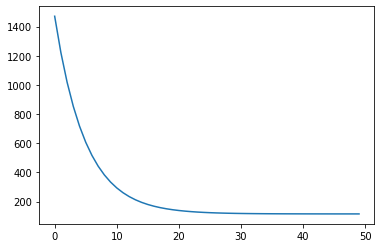

loss:  [1470.6239444294392, 1221.8478175639793, 1018.7516122360761, 852.9476456806309, 717.5883696117627, 607.0835729019623, 516.8695111064376, 443.22042809857794, 383.0946858368802, 334.0091475670513, 293.9366266033689, 261.22216542016963, 234.514687458476, 212.7111989314919, 194.9112362158742, 180.37967754877116, 168.51638318859912, 158.83141020667844, 150.9247783038709, 144.4699509994278, 139.200349980644, 134.8983456686071, 131.38626932073677, 128.51907547837857, 126.17835172542217, 124.26742836659278, 122.70738605971741, 121.43379652092405, 120.3940616969547, 119.54524151490537, 118.85228049749558, 118.28656000474028, 117.82471631096423, 117.4476757048483, 117.13986676304376, 116.88857726499515, 116.68342919015585, 116.51595011547474, 116.37922331227163, 116.26760209183118, 116.17647660245582, 116.10208344691483, 116.0413502576691, 115.99176881097371, 115.9512914395901, 115.9182464660501, 115.89126916394437, 115.86924539600213, 115.85126560126682, 115.83658723108178]


In [66]:
plt.plot(LinearRegression_obj.loss)
plt.show()
#print("y: ", y)
#print("y_test_hat: ", y_test_hat)
print("loss: ", LinearRegression_obj.loss)
    

In [67]:
# Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(X_train, y_train, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 100)
    #print("LinearRegression_obj.history_weights[i]: ", LinearRegression_obj.history_weights[i])
    y = LinearRegression_obj.history_weights[i][0]*x
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (LinearRegression_obj.loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=epochs, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)


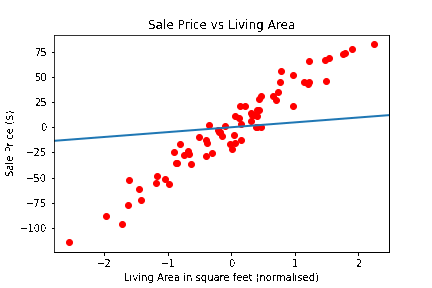

In [68]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))